In [109]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [110]:
true = pd.read_csv('True.csv')
fake = pd.read_csv('Fake.csv')

In [111]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [112]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [113]:
true['category'] = 1
fake['category'] = 0

In [114]:
df = pd.concat([true,fake])

In [115]:
df.head()

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     44898 non-null  object
 1   text      44898 non-null  object
 2   subject   44898 non-null  object
 3   date      44898 non-null  object
 4   category  44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [117]:
df.describe()

,category
count,44898.000000
mean,0.477015
std,0.499477
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


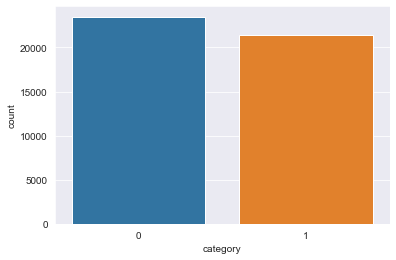

In [118]:
# Data is now more or less balanced

sns.set_style("darkgrid")
sns.countplot(df.category)

In [119]:
df.isnull().sum()

title       0
text        0
subject     0
date        0
category    0
dtype: int64

In [120]:
df.title.count()

44898

In [121]:
df.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

[Text(0, 0, 'politicsNews'),
 Text(0, 0, 'worldnews'),
 Text(0, 0, 'News'),
 Text(0, 0, 'politics'),
 Text(0, 0, 'Government News'),
 Text(0, 0, 'left-news'),
 Text(0, 0, 'US_News'),
 Text(0, 0, 'Middle-east')]

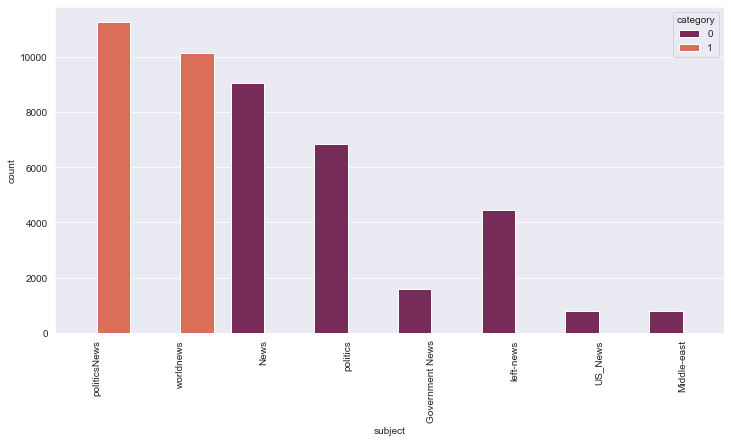

In [122]:
plt.figure(figsize = (12,6))

chart = sns.countplot(x = "subject", hue = "category" , data = df , palette = 'rocket')
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

In [123]:
df['text'] = df['text'] + " " + df['title']
del df['title']
del df['subject']
del df['date']

In [16]:
df.head()

,text,category
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


In [17]:
df['length'] = df['text'].apply(len)
df.head()

,text,category,length
0,WASHINGTON (Reuters) - The head of a conservat...,1,4724
1,WASHINGTON (Reuters) - Transgender people will...,1,4142
2,WASHINGTON (Reuters) - The special counsel inv...,1,2850
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1,2521
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1,5274


# Data Visualisation

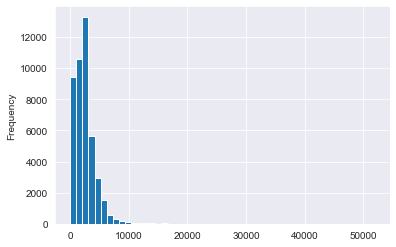

In [18]:
df['length'].plot(bins=50, kind='hist') 

In [19]:
df.length.describe()

count    44898.000000
mean      2550.221413
std       2172.578772
min         31.000000
25%       1318.000000
50%       2270.000000
75%       3189.000000
max      51893.000000
Name: length, dtype: float64

In [20]:
df[df['length'] == 910]['text'].iloc[0]

'WASHINGTON (Reuters) - Democratic U.S. Representative Luis Gutierrez of Illinois, a prominent critic of President Donald Trump’s immigration policies, will not seek re-election next year, Politico reported on Monday. Citing three Democratic sources with knowledge of the decision, Politico reported that Gutierrez was expected to announce his decision not to run on Tuesday. Gutierrez’s office did not immediately respond to a request for comment.  Politico reported that former Chicago mayoral candidate Jesus “Chuy” Garcia was expected to enter the race for Guiterrez’s seat in the heavily Hispanic 4th District, which includes parts of Chicago and some suburbs west of the city. Gutierrez, who is of Puerto Rican descent, has criticized Trump’s efforts to restrict immigration and to deport millions of illegal immigrants in the United States.       Congressman Gutierrez will not seek re-election: Politico'

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000AFD867DFC8>,
      dtype=object)

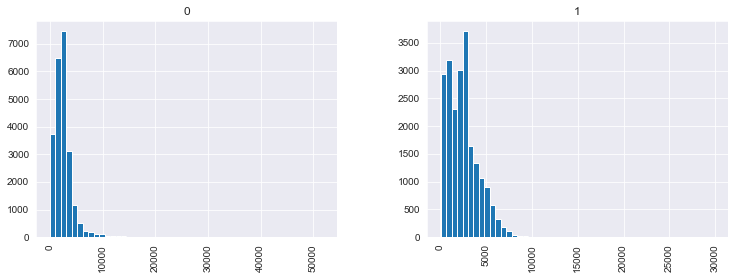

In [21]:
df.hist(column='length', by='category', bins=50,figsize=(12,4))

# Text Preprocessing

In [124]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup

In [23]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.....

        PC\AppData\Roaming\nltk_data...
      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> wordnet


        PC\AppData\Roaming\nltk_data...
      Package wordnet is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> punkt


        PC\AppData\Roaming\nltk_data...
      Package punkt is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [24]:
df['text']

0        WASHINGTON (Reuters) - The head of a conservat...
1        WASHINGTON (Reuters) - Transgender people will...
2        WASHINGTON (Reuters) - The special counsel inv...
3        WASHINGTON (Reuters) - Trump campaign adviser ...
4        SEATTLE/WASHINGTON (Reuters) - President Donal...
                               ...                        
23476    21st Century Wire says As 21WIRE reported earl...
23477    21st Century Wire says It s a familiar theme. ...
23478    Patrick Henningsen  21st Century WireRemember ...
23479    21st Century Wire says Al Jazeera America will...
23480    21st Century Wire says As 21WIRE predicted in ...
Name: text, Length: 44898, dtype: object

In [ ]:
nltk.download_shell()

In [56]:
lm = WordNetLemmatizer()

def lem(text):
    text = " ".join([lm.lemmatize(word) for word in text])
    return text

In [57]:
df['text'].tail(1).apply(lem)

23480    2 1 s t   C e n t u r y   W i r e   s a y s   ...
Name: text, dtype: object

In [ ]:
nltk.download_shell()

In [125]:
'''

def text_process(text):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


'''


def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)


def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    
    
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]



In [126]:
df['text'].head(5).apply(text_process)

0    [WASHINGTON, Reuters, head, conservative, Repu...
1    [WASHINGTON, Reuters, Transgender, people, all...
2    [WASHINGTON, Reuters, special, counsel, invest...
3    [WASHINGTON, Reuters, Trump, campaign, adviser...
4    [SEATTLEWASHINGTON, Reuters, President, Donald...
Name: text, dtype: object

# Vectorization

In [127]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [61]:
X = df['text']
y = df['category']

In [ ]:
X = cv.fit_transform(X)

In [128]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

# Train Test Split

In [62]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [79]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [80]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000000AFEE71ADC8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [81]:
predictions = pipeline.predict(X_test)

In [103]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score

In [83]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[6701  277]
 [ 163 6329]]


              precision    recall  f1-score   support

           0       0.98      0.96      0.97      6978
           1       0.96      0.97      0.97      6492

    accuracy                           0.97     13470
   macro avg       0.97      0.97      0.97     13470
weighted avg       0.97      0.97      0.97     13470



# Using Random Forest

In [143]:
from sklearn.ensemble import RandomForestClassifier


In [144]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier(n_estimators = 600)),  # train on TF-IDF vectors w/ Random Forest classifier
])

In [145]:
X = df['text']
y = df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [148]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000000AFEE71A318>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.

In [149]:
predictions = pipeline.predict(X_test)

In [150]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[6920   58]
 [  17 6475]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      6978
           1       0.99      1.00      0.99      6492

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



In [151]:
print("accuracy: {}%".format(round(accuracy_score(y_test, predictions)*100,2)))

accuracy: 99.44%


# Using SCV

In [135]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [136]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', SVC()),  # train on TF-IDF vectors w/ Support Vector Machines
])

In [137]:
X = df['text']
y = df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [139]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000000AFEE71A318>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w...
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0

In [140]:
predictions = pipeline.predict(X_test)

In [141]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      6978
           1       0.99      1.00      1.00      6492

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470



In [142]:
print("accuracy: {}%".format(round(accuracy_score(y_test, predictions)*100,2)))

accuracy: 99.52%
